In [1]:
import pandas as pd

df_train = pd.read_csv('train.csv',index_col='Id')
df_test = pd.read_csv('test.csv',index_col='Id')

df_all = pd.concat([df_train,df_test])
df_all.info()
df_all.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


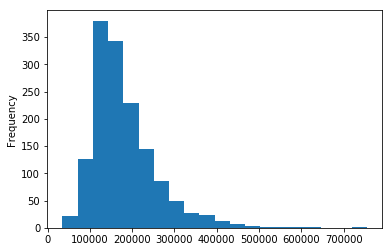

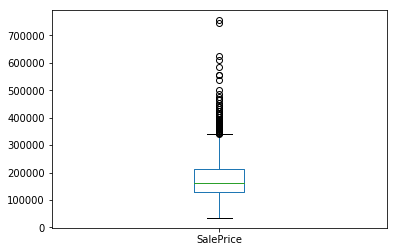

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

print(df_all.SalePrice.describe())

plt.figure()
df_all.SalePrice.plot.hist(bins=20)

plt.figure()
df_all.SalePrice.plot.box()


In [7]:
dtypes = df_all.dtypes
cols_numeric = dtypes[dtypes != object].index.tolist()

# MSubClass values should be treated as categories instead
cols_numeric.remove('MSSubClass')

print(len(cols_numeric),'numeric columns')

36 numeric columns


In [10]:
cols_categ = dtypes[~dtypes.index.isin(cols_numeric)].index.tolist()

for col in cols_categ:
    df_all[col] = df_all[col].astype('category')
    
print(len(cols_categ),'categorical columns')

44 categorical columns


In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null category
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null category
BsmtCond         2837 non-null category
BsmtExposure     2837 non-null category
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null category
BsmtFinType2     2839 non-null category
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null category
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null category
Condition1       2919 non-null category
Condition2       2919 non-null category
Electrical       2918 non-null category
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null category
ExterQual        2919 non-null cat

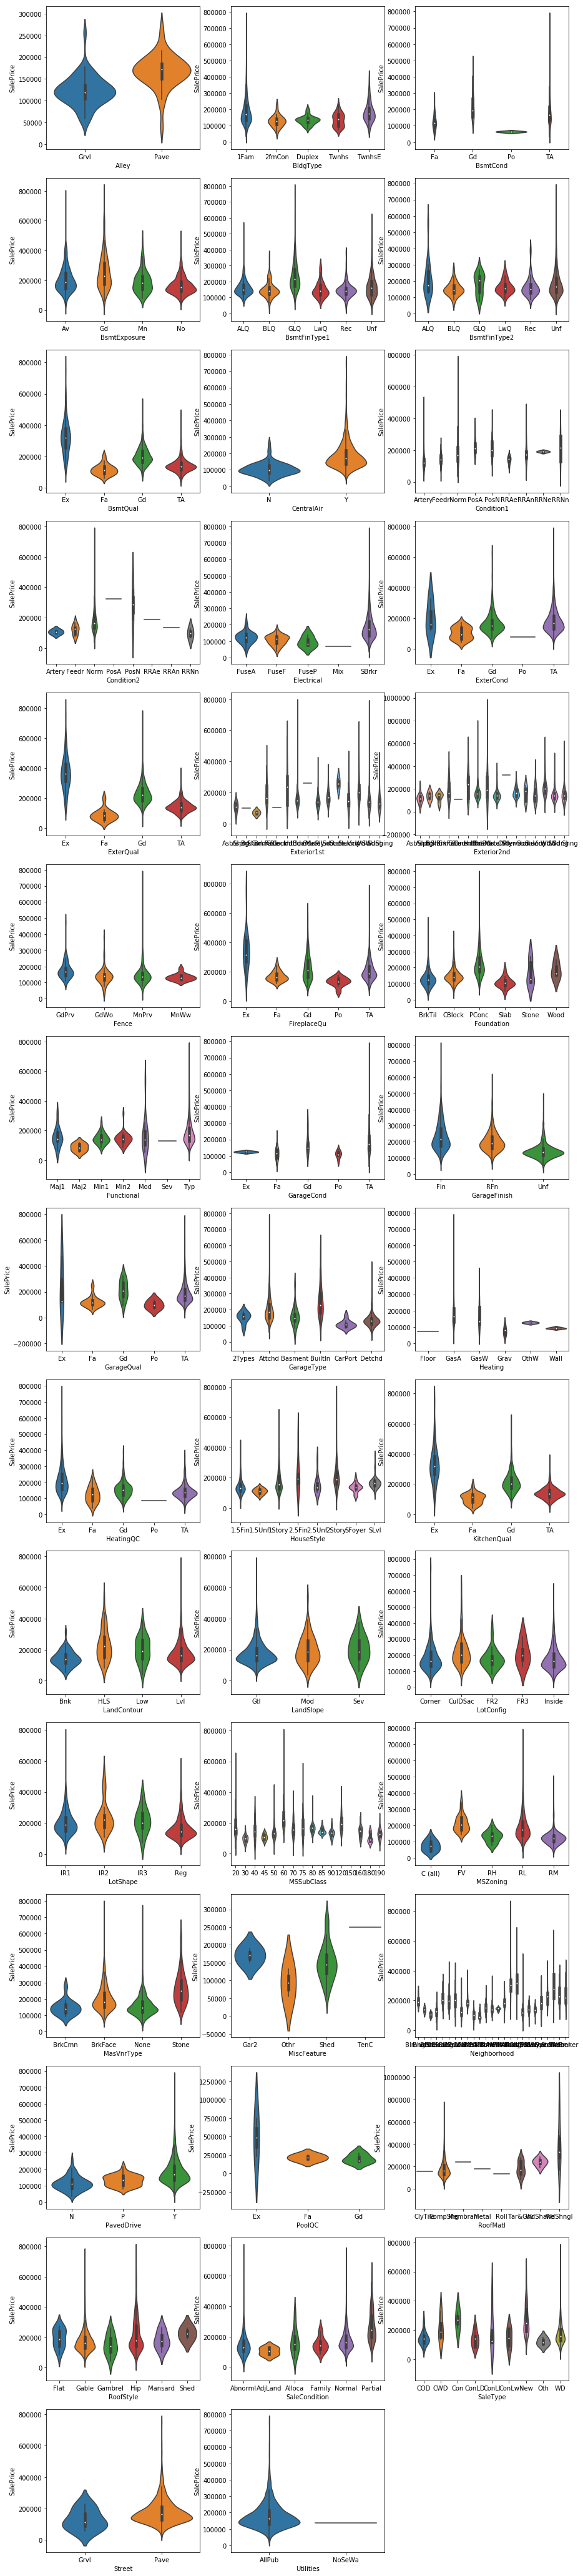

In [19]:
import numpy as np
from math import ceil
import seaborn as sns

fcols = 3
frows = ceil(len(cols_categ)/fcols)
plt.figure(figsize=(15,5*frows))

for i,col in enumerate(cols_categ):
    plt.subplot(frows,fcols,i+1)
    sns.violinplot(df_all[col],df_all['SalePrice'])

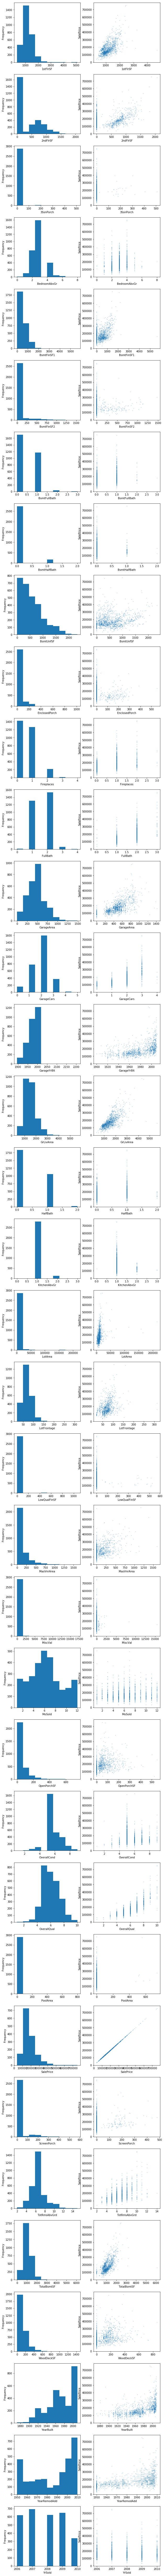

In [28]:
fcols = 2
frows = len(cols_categ)
plt.figure(figsize=(5*fcols,5*frows))

i=0
for col in cols_numeric:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    df_all[col].plot.hist(ax=ax)
    plt.xlabel(col)
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    df_all.plot.scatter(x=col,y='SalePrice',s=2,alpha=0.25,ax=ax)
    plt.xlabel(col)
    plt.ylabel('SalePrice')

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


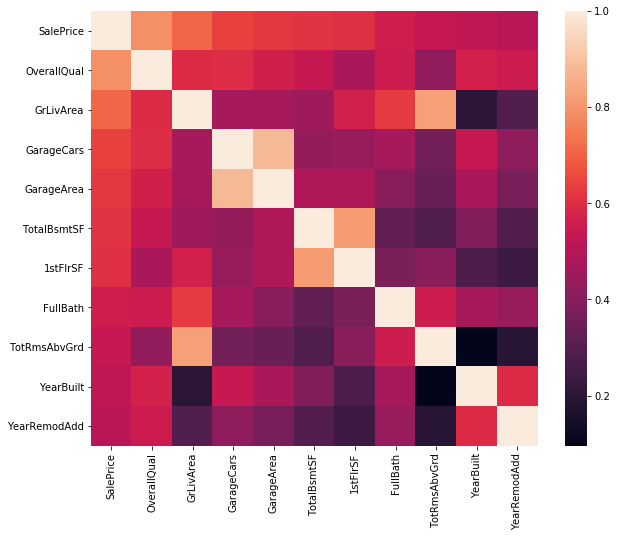

In [5]:
df_corr = df_train.corr().abs()
df_sale_corr = df_corr.SalePrice.sort_values(ascending=False)
print(df_sale_corr[df_sale_corr>0.5])

ax=plt.figure(figsize=(10,8)).gca()
sns.heatmap(df_corr.loc[df_sale_corr[df_sale_corr>0.5].index,df_sale_corr[df_sale_corr>0.5].index],ax=ax)